In [461]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [574]:
os.getcwd()

'/Users/ryanfisher/Documents/Springboard/Springboard/Capstone 3'

In [ ]:
os.listdir()

In [565]:
df = pd.read_csv('data_by_artist.csv')
df.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


## Getting data for test cases

In [500]:
df[df['artists']=='50 Cent']

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
112,1,178,0.122386,50 Cent,0.695039,234964.089888,0.762388,0.000548,0.198361,-4.149427,0.259516,105.929427,0.58977,52.342697,1


In [499]:
df[df['artists']=='Eminem']

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
7481,0,488,0.143151,Eminem,0.730357,266668.690574,0.742206,0.007473,0.237455,-5.042256,0.271989,115.337803,0.551962,55.75,1


In [498]:
df[df['artists']=='Taylor Swift']

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
24076,1,440,0.225236,Taylor Swift,0.60248,237971.727273,0.615055,0.000423,0.147943,-6.481543,0.050815,122.845527,0.426964,59.177273,7


In [497]:
df[df['artists']=='Backstreet Boys']

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
2021,0,86,0.151633,Backstreet Boys,0.64193,236439.069767,0.698558,0.000008,0.169607,-5.762256,0.03643,117.099326,0.538442,54.116279,10


In [496]:
df[df['artists']=="*NSYNC"]

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
22,1,105,0.191611,*NSYNC,0.608743,236775.152381,0.694429,0.002703,0.20286,-6.2738,0.057138,115.615886,0.564781,45.371429,0


In [495]:
df[df['artists']=="Bee Gees"]

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
2313,1,275,0.252722,Bee Gees,0.562131,228601.218182,0.507201,0.046149,0.230012,-11.299305,0.041326,107.778349,0.602027,42.370909,7


In [494]:
df[df['artists']=="The Beatles"]

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
24346,1,817,0.359534,The Beatles,0.522404,174591.257038,0.546576,0.052255,0.221973,-9.687188,0.053337,121.252759,0.619537,47.203182,0


# Preprocessing

In [588]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

df2 = df.drop(['mode','count','artists'], axis =1)
X = df2.values
X = preprocessing.StandardScaler().fit_transform(X)

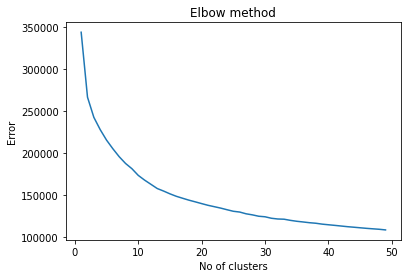

In [589]:
Error =[]
for i in range(1,50):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 50), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# Modeling

In [590]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit(X).transform(X)

In [591]:
pca_df = pd.DataFrame(data = pca_data, columns = ['component1', 'component2'] )

In [592]:
kmeans = KMeans(n_clusters=25)
labels = kmeans.fit_predict(pca_data)
pca_df['cluster']=labels
pca_df['artist']=df['artists']
pca_df.loc[[112, 7481, 24076,2021,22,2313,24346], :]

,component1,component2,cluster,artist
112,-2.225947,-0.269738,11,50 Cent
7481,-2.232786,-0.214152,11,Eminem
24076,-1.404245,1.007293,9,Taylor Swift
2021,-1.811278,0.709975,21,Backstreet Boys
22,-1.488304,0.487756,9,*NSYNC
2313,-0.563277,0.162739,5,Bee Gees
24346,-0.710991,0.168398,5,The Beatles


In [560]:
#50 - Cent: 112; Eminem: 7481; 
#Taylor Swift: 24076; 
#Backstreet Boys: 2021; NSync: 22; 
#Bee Gees: 2313; The Beatles: 24346

df2.loc[[112, 7481, 24076,2021,22,2313,24346]]

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
112,0.122386,0.695039,234964.089888,0.762388,0.000548,0.198361,-4.149427,0.259516,105.929427,0.589770,52.342697,1,12
7481,0.143151,0.730357,266668.690574,0.742206,0.007473,0.237455,-5.042256,0.271989,115.337803,0.551962,55.750000,1,12
24076,0.225236,0.602480,237971.727273,0.615055,0.000423,0.147943,-6.481543,0.050815,122.845527,0.426964,59.177273,7,9
2021,0.151633,0.641930,236439.069767,0.698558,0.000008,0.169607,-5.762256,0.036430,117.099326,0.538442,54.116279,10,9
22,0.191611,0.608743,236775.152381,0.694429,0.002703,0.202860,-6.273800,0.057138,115.615886,0.564781,45.371429,0,10
2313,0.252722,0.562131,228601.218182,0.507201,0.046149,0.230012,-11.299305,0.041326,107.778349,0.602027,42.370909,7,9
24346,0.359534,0.522404,174591.257038,0.546576,0.052255,0.221973,-9.687188,0.053337,121.252759,0.619537,47.203182,0,10


In [609]:
import numpy
a = numpy.array((-1.404245, 1.007293)) #Taylor Swift
b = numpy.array((-1.811278, 0.709975)) #Backstreet Boys
c = numpy.array((-1.488304, 0.487756)) #NSync

dist_a_b = numpy.linalg.norm(a-b)
dist_a_b

0.5040573937688048

In [610]:
dist_b_c = numpy.linalg.norm(b-c)
dist_b_c

0.39203761125305303

In [606]:
pca_df.to_csv(r'/Users/ryanfisher/Documents/Springboard/Springboard/Capstone 3/pca_df.csv',index=False,header=True)

<Figure size 432x288 with 0 Axes>

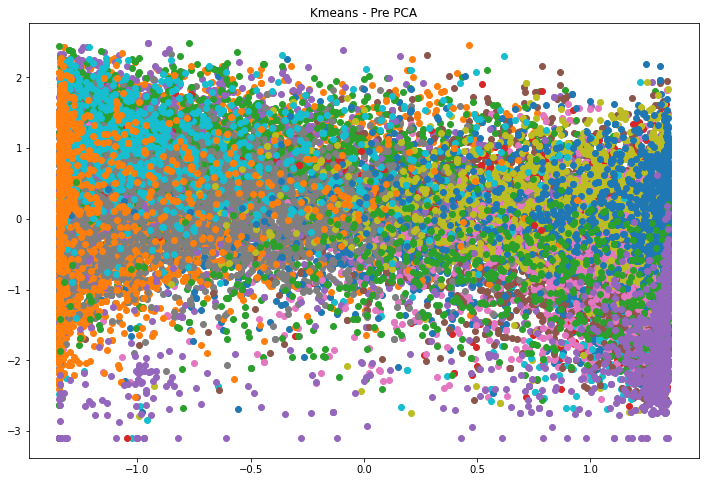

In [599]:
plt.figure()
plt.figure(figsize=(12,8))

for i in range(100):
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.title('Kmeans - Pre PCA')
plt.show()

<Figure size 432x288 with 0 Axes>

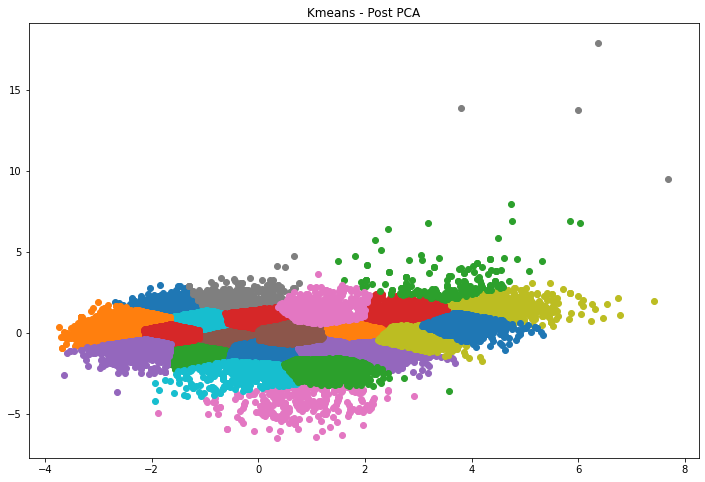

In [603]:
plt.figure()
plt.figure(figsize=(12,8))

for i in range(25):
    plt.scatter(pca_data[labels == i , 0] , pca_data[labels == i , 1] , label = i)
plt.title('Kmeans - Post PCA')
plt.show()


In [604]:
#Initialize the class object
aggcl = AgglomerativeClustering(n_clusters = 25)
 
#predict the labels of clusters.
aggl_label = aggcl.fit_predict(pca_data)

<Figure size 432x288 with 0 Axes>

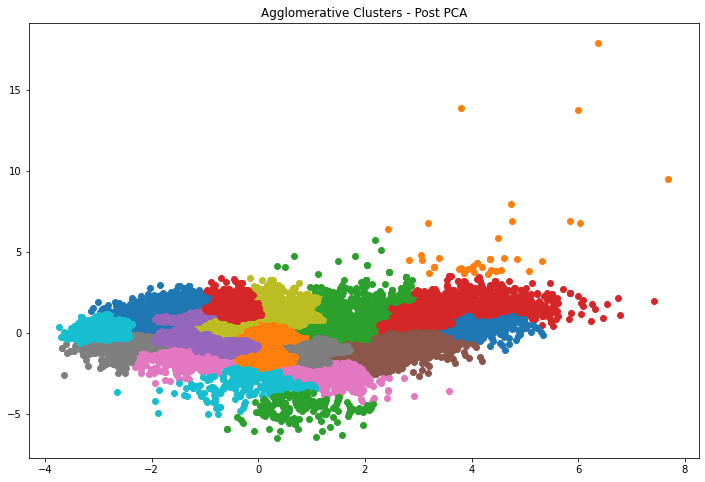

In [605]:
plt.figure()
plt.figure(figsize=(12,8))

for i in aggl_u_labels:
    plt.scatter(pca_data[aggl_label == i , 0] , pca_data[aggl_label == i , 1] , label = i)
plt.title('Agglomerative Clusters - Post PCA')
plt.show()